#Bringing in the Data and Observing it

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

try:
  data = pd.read_excel('Amazon_2_Raw.xlsx')
except:
  drive.mount('/content/drive')
  data = pd.read_excel('/content/drive/MyDrive/PROJECTS/Amazon_Sales_DA_Project/Amazon_2_Raw.xlsx')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Order ID Order Date  Ship Date                   EmailID  \
0  CA-2013-138688 2013-06-13 2013-06-17   DarrinVanHuff@gmail.com   
1  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
2  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
3  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   
4  CA-2011-115812 2011-06-09 2011-06-14  BrosinaHoffman@gmail.com   

                              Geography     Category  \
0  United States,Los Angeles,California       Labels   
1  United States,Los Angeles,California  Furnishings   
2  United States,Los Angeles,California          Art   
3  United States,Los Angeles,California       Phones   
4  United States,Los Angeles,California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
3                     Mitel 5320 IP Phone VoIP phone  907.152         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   

    Profit  
0   6.8714  
1  14.1694  
2   1.9656  
3  90.7152  
4   5.7825

##Data Information

Some immediate insights are:
* We have 10 columns and 3,303 rows
* No null values in any columns
* No missing data in any of the columns
* Column names are clear on what they represent
* General Summary Statistics that we will dive into further

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [ ]:
data.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [ ]:
data.describe().T

count                           mean                  min  \
Order Date    3203  2013-05-10 03:06:07.530440192  2011-01-07 00:00:00   
Ship Date     3203  2013-05-14 01:25:25.195129600  2011-01-09 00:00:00   
Sales       3203.0                     226.493233                 0.99   
Quantity    3203.0                        3.82891                  1.0   
Profit      3203.0                      33.849032             -3399.98   

                            25%                  50%                  75%  \
Order Date  2012-05-22 00:00:00  2013-07-22 00:00:00  2014-05-23 00:00:00   
Ship Date   2012-05-26 00:00:00  2013-07-25 00:00:00  2014-05-27 00:00:00   
Sales                     19.44                60.84              215.809   
Quantity                    2.0                  3.0                  5.0   
Profit                    3.852              11.1664              33.0004   

                            max         std  
Order Date  2014-12-31 00:00:00         NaN  
Ship Date   2015-01-06 00:00:00         NaN  
Sales                  13999.96  524.876877  
Quantity                   14.0    2.260947  
Profit                6719.9808  174.109081

In [ ]:
data.describe(include='O').T

count unique                                   top freq
Order ID      3203   1611                        CA-2013-165330   11
EmailID       3203    686                WilliamBrown@gmail.com   24
Geography     3203    170  United States,Los Angeles,California  747
Category      3203     17                               Binders  471
Product Name  3203   1494                               Staples   60

In [ ]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

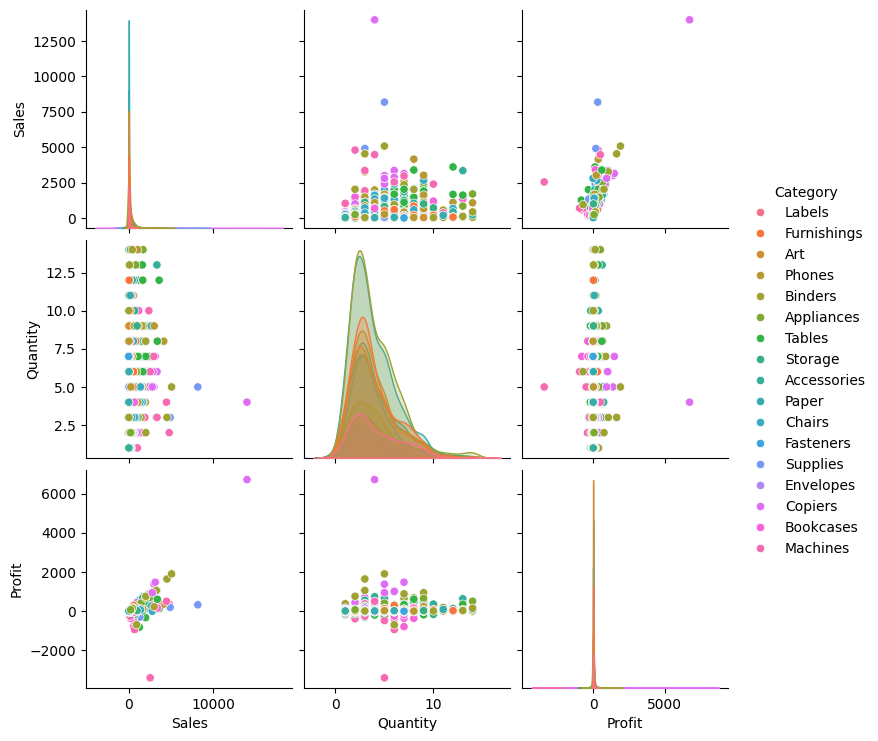

In [ ]:
# General observation of numeric variables
sns.pairplot(data, hue = 'Category', diag_kind='kde')

# Email to Name

To make it a little more visual, lets create a function to get rid of all the unnecessary text in `Customer` so that we can read our customers by their name.

In [ ]:
def format_email_to_name(email):
    # Remove everything from @ onwards
    name = email.split('@')[0]

    # Find the boundary between first and last name (where uppercase letter appears)
    for i in range(1, len(name)):
        if name[i].isupper():
            # Split at the uppercase letter and join with space
            return name[:i] + ' ' + name[i:]

    # Return original name if no uppercase letter found
    return name

# Example usage with a DataFrame
def apply_to_dataframe(df, email_column):
    return pd.DataFrame(df[email_column].apply(format_email_to_name))

In [ ]:
customer_data = apply_to_dataframe(data, 'EmailID')

In [ ]:
data['EmailID'] = customer_data['EmailID']
data = pd.DataFrame(data)
data.rename(columns={'EmailID': 'Customer'}, inplace=True)
data.head()

Order ID Order Date  Ship Date         Customer  \
0  CA-2013-138688 2013-06-13 2013-06-17   Darrin VanHuff   
1  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   
2  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   
3  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   
4  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   

                              Geography     Category  \
0  United States,Los Angeles,California       Labels   
1  United States,Los Angeles,California  Furnishings   
2  United States,Los Angeles,California          Art   
3  United States,Los Angeles,California       Phones   
4  United States,Los Angeles,California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
3                     Mitel 5320 IP Phone VoIP phone  907.152         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   

    Profit  
0   6.8714  
1  14.1694  
2   1.9656  
3  90.7152  
4   5.7825

#Question 1
- How much are our top-ordered customers bringing in as profit?
- How does this profit compare to other customers?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   Customer      3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [ ]:
#Find out who our top-ordered customers are (top 10)
top_10 = data["Customer"].value_counts()[:10].reset_index()
top_10.columns = ['Customer', 'Number of Purchases']
top_10

Customer  Number of Purchases
0     William Brown                   24
1    Arthur Prichep                   23
2       Rick Wilson                   19
3      Greg Guthrie                   17
4  Zuschuss Carroll                   16
5      Darrin Sayre                   16
6     Sally Hughsby                   15
7    Lena Creighton                   15
8    Arianne Irving                   15
9     Lena Cacioppo                   15

In [ ]:
#make customer list for our graph later
customer_list = top_10['Customer'].tolist()
customer_list

['William Brown',
 'Arthur Prichep',
 'Rick Wilson',
 'Greg Guthrie',
 'Zuschuss Carroll',
 'Darrin Sayre',
 'Sally Hughsby',
 'Lena Creighton',
 'Arianne Irving',
 'Lena Cacioppo']

In [ ]:
#Lets add the cumulative profits for each top-ordered customer

profit_list = []
for name in customer_list:
    profit_list.append(data.Profit[data.Customer == name].sum().round(2))

top_10['Profit'] = profit_list
top_10

Customer  Number of Purchases   Profit
0     William Brown                   24   825.29
1    Arthur Prichep                   23   379.32
2       Rick Wilson                   19  1018.50
3      Greg Guthrie                   17   122.35
4  Zuschuss Carroll                   16   346.09
5      Darrin Sayre                   16   141.67
6     Sally Hughsby                   15   269.37
7    Lena Creighton                   15   350.57
8    Arianne Irving                   15   792.83
9     Lena Cacioppo                   15   157.93

Text(0.5, 1.0, 'Top 10 Customer Profits by Number of Orders')

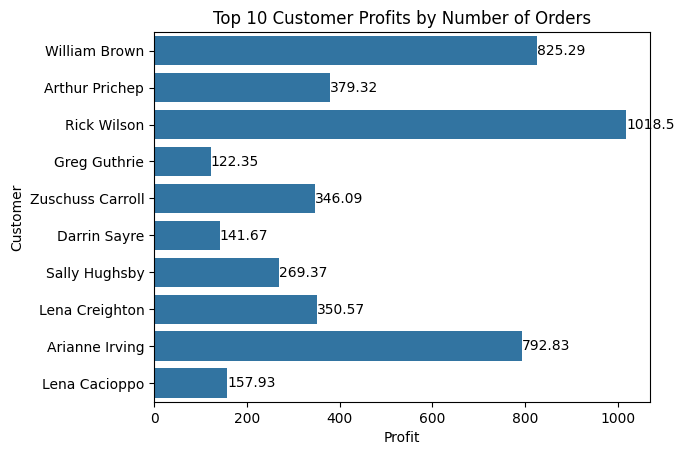

In [ ]:
ax = sns.barplot(top_10, x='Profit', y='Customer', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Top 10 Customer Profits by Number of Orders')

In [ ]:
#How do they compare to other customers? Are our top 10 ordered customers our most profitable?

#Finding top 10 earners
all_customers = data.Customer.unique()

top_earners = []
for name in all_customers:
    top_earners.append(data.Profit[data.Customer == name].sum())

top_df = pd.DataFrame(all_customers, top_earners).reset_index()
top_df.columns = (['Total_profit', 'Customer'])
top10_earners = top_df.sort_values('Total_profit', ascending = False)[:10]
top10_earners

Total_profit         Customer
609     6807.0879     Raymond Buch
196     2073.2828        Jane Waco
218     1991.9043     Fred Hopkins
397     1789.6906    Dennis Pardue
465     1598.5092    Robert Marley
214     1551.5945    Yana Sorensen
70      1535.8919   Alan Dominguez
203     1185.3977       Gary Hwang
62      1148.7333      Joseph Holt
384     1056.3060  Penelope Sewall

Text(0.5, 1.0, 'Top 10 Customer Profits')

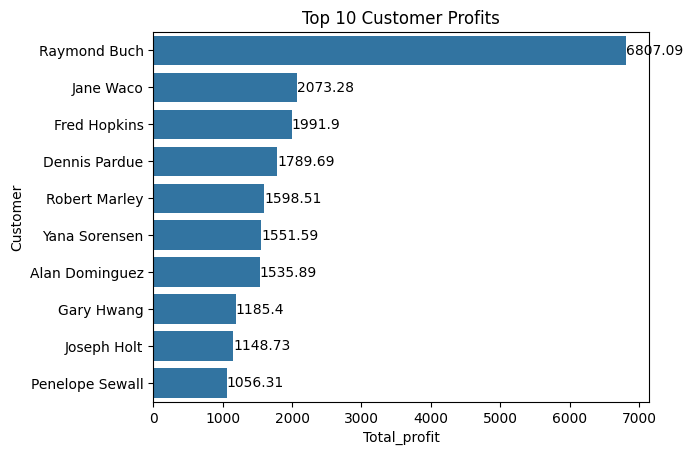

In [ ]:
ax = sns.barplot(top10_earners, x='Total_profit', y='Customer', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Top 10 Customer Profits')

We can observe from this data that the number of orders does not relate to total profits within this dataset. None of our top-ordered customers were featured in the top 10 overall earners.

We should also think about sending Mr. Raymond Buch a thank you card from the company for being a well-valued customer.

#Question 2
- What kinds of products are bringing in the most profit?

In [ ]:
#Lets see what types of products our top 10 earners were purchasing
top10_customers = top10_earners['Customer'].tolist()
filtered_data = data[data['Customer'].isin(top10_customers)]

customer_category_lists = {}

for index, row in filtered_data.iterrows():
  customer = row['Customer']
  category = row['Category']

  if customer not in customer_category_lists:
    customer_category_lists[customer] = []

  customer_category_lists[customer].append(category)

customer_category_profit = {}

for index, row in filtered_data.iterrows():
  customer = row['Customer']
  category = row['Category']
  profit = row['Profit']

  if customer not in customer_category_profit:
    customer_category_profit[customer] = {}

  customer_category_profit[customer][category] = profit

customer_category_profit

{'Joseph Holt': {'Appliances': 36.372,
  'Accessories': 377.9622,
  'Binders': 19.968,
  'Paper': 46.1184,
  'Fasteners': 1.7876},
 'Alan Dominguez': {'Copiers': 1379.977, 'Storage': 56.301, 'Paper': 80.3404},
 'Jane Waco': {'Furnishings': 3.6632,
  'Chairs': -99.6219,
  'Paper': 180.7659,
  'Accessories': 39.8886,
  'Phones': -7.996,
  'Binders': 1906.485},
 'Gary Hwang': {'Furnishings': 2.6208,
  'Paper': 61.96,
  'Storage': -58.6872,
  'Art': 9.7092,
  'Fasteners': 8.95,
  'Binders': 1061.5722,
  'Accessories': 43.5981},
 'Yana Sorensen': {'Storage': 4.4392,
  'Binders': 942.8157,
  'Furnishings': 22.4196,
  'Accessories': 40.12,
  'Chairs': -38.2116},
 'Fred Hopkins': {'Storage': 2.7062,
  'Copiers': 1480.4671,
  'Paper': 100.656,
  'Binders': 51.8238,
  'Art': 6.912},
 'Penelope Sewall': {'Copiers': 1049.985, 'Paper': 6.321},
 'Dennis Pardue': {'Appliances': 24.3595,
  'Storage': 4.1916,
  'Fasteners': 1.9698,
  'Binders': 1644.2913,
  'Art': 29.4372,
  'Paper': 17.5812},
 'Robert

In [ ]:
#Lets pop Raymond's copiers profit to increase visibilbity on our graph
#We will take into account that this value is the highest profit amongst all top earners by far
customer_category_profit['Raymond Buch'].pop('Copiers')

6719.9808

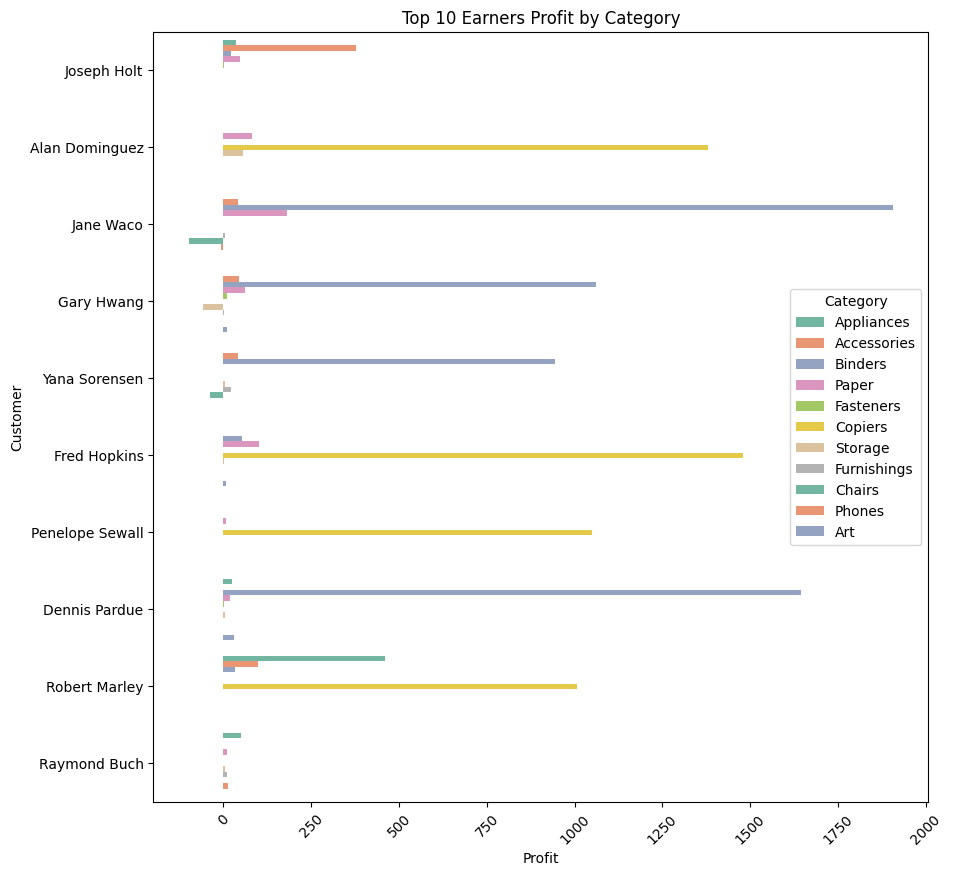

In [ ]:
#Lets graph the results using a horizontal bar graph in seaborn

# Flatten the nested dictionary
ccp_flattened_data = [(customer, category, profit)
                  for customer, categories in customer_category_profit.items()
                  for category, profit in categories.items()]

# Create a DataFrame from the flattened data
df = pd.DataFrame(ccp_flattened_data, columns=['Customer', 'Category', 'Profit'])

# Create a horizontal bar plot
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Profit', y= 'Customer', hue='Category', data=df, orient='h', linewidth = 10, palette = 'Set2')

# Set plot title
plt.title('Top 10 Earners Profit by Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

We can deduce from this graph that the Categories "Copiers" and "Binders" dominate the top profit spots for these top earners. Also remember that Mr. Raymond Buch had a profit of $6719 from copiers that would have extended well beyond this graph.

Depending on profit margins for the other categories, we can choose to advertise for products not yet appearing in our top results or hit harder on the categories that are bringing in these massive profits.



Does this hold true for the total amount of profit per category?

In [ ]:
#Finding the total profit for each category
df_cat_profit = data.groupby(['Category']).Profit.sum().reset_index()
df_sorted = df_cat_profit.sort_values(by = 'Profit', ascending = False)
df_sorted

Category      Profit
6       Copiers  19327.2351
0   Accessories  16484.5983
3       Binders  16096.8016
12        Paper  12119.2364
13       Phones   9110.7426
14      Storage   8645.3222
1    Appliances   8261.2699
9   Furnishings   7641.2704
5        Chairs   4027.5843
2           Art   2374.0970
10       Labels   2303.1223
7     Envelopes   1908.7624
16       Tables   1482.6073
15     Supplies    626.0465
8     Fasteners    275.1907
11     Machines   -618.9264
4     Bookcases  -1646.5117

In [ ]:
#Finding the Profit Margin for each Category
#Bearing in mind that our data does not show the cost/expenses to make each item
#Our Profit Margin in this case is defined by "Profit / Sales"

df_small = data.groupby('Category')[['Sales', 'Quantity', 'Profit']].sum()
df_small['Profit_Margin'] = ((df_small['Profit'] / df_small['Sales']) * 100).round(2)
df_small.sort_values(by = "Profit_Margin", ascending = False)

Sales  Quantity      Profit  Profit_Margin
Category                                                     
Envelopes      4118.1000       227   1908.7624          46.35
Paper         26663.7180      1702  12119.2364          45.45
Labels         5078.7260       480   2303.1223          45.35
Copiers       49749.2420        88  19327.2351          38.85
Fasteners       923.2160       263    275.1907          29.81
Binders       55961.1130      1868  16096.8016          28.76
Appliances    30236.3360       492   8261.2699          27.32
Accessories   61114.1160      1032  16484.5983          26.97
Art            9212.0660       926   2374.0970          25.77
Furnishings   30072.7300      1175   7641.2704          25.41
Storage       70532.8520      1039   8645.3222          12.26
Phones        98684.3520      1066   9110.7426           9.23
Chairs       101781.3280       734   4027.5843           3.96
Supplies      18127.1220       238    626.0465           3.45
Tables        84754.5620       481   1482.6073           1.75
Machines      42444.1220       147   -618.9264          -1.46
Bookcases     36004.1235       306  -1646.5117          -4.57

We can see that the theme of Copiers and Binders being our most profitable throughout holds true for our top earners as well.

We can also visualize a slight correlation between categories that bring in the most profit and their respective profit margin which would make sense. The higher the profit margin, the more we should profit from them based on a sizeable amount of orders. Vice-versa for the categories that have a low profit margin.

#Question 3
- Can we deduce what areas are bringing in the most profit? The least?

In [ ]:
data.head()

Order ID Order Date  Ship Date         Customer  \
0  CA-2013-138688 2013-06-13 2013-06-17   Darrin VanHuff   
1  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   
2  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   
3  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   
4  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman   

                              Geography     Category  \
0  United States,Los Angeles,California       Labels   
1  United States,Los Angeles,California  Furnishings   
2  United States,Los Angeles,California          Art   
3  United States,Los Angeles,California       Phones   
4  United States,Los Angeles,California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                                         Newell 322    7.280         4   
3                     Mitel 5320 IP Phone VoIP phone  907.152         4   
4  DXL Angle-View Binders with Locking Rings by S...   18.504         3   

    Profit  
0   6.8714  
1  14.1694  
2   1.9656  
3  90.7152  
4   5.7825

In [ ]:
data["Geography"] = data["Geography"].str.split(",").str[-2]
data['Geography']

0       Los Angeles
1       Los Angeles
2       Los Angeles
3       Los Angeles
4       Los Angeles
           ...     
3198    Los Angeles
3199     Costa Mesa
3200     Costa Mesa
3201     Costa Mesa
3202    Westminster
Name: Geography, Length: 3203, dtype: object

In [ ]:
#Lets start by segmenting the areas we want to examine
geo_df = pd.DataFrame(data[['Geography', 'Category', 'Profit']])
geo_df

Geography     Category   Profit
0     Los Angeles       Labels   6.8714
1     Los Angeles  Furnishings  14.1694
2     Los Angeles          Art   1.9656
3     Los Angeles       Phones  90.7152
4     Los Angeles      Binders   5.7825
...           ...          ...      ...
3198  Los Angeles  Accessories  15.2208
3199   Costa Mesa  Furnishings  15.6332
3200   Costa Mesa       Phones  19.3932
3201   Costa Mesa        Paper  13.3200
3202  Westminster   Appliances  72.9480

[3203 rows x 3 columns]

In [ ]:
geo_df = geo_df.groupby('Geography')[['Profit']].sum()
city_profits = geo_df.sort_values(by = "Profit", ascending = False).reset_index()
city_profits

Geography      Profit
0         Los Angeles  30440.7579
1             Seattle  29156.0967
2       San Francisco  17507.3854
3           San Diego   6377.1960
4     North Las Vegas   2247.6899
..                ...         ...
164       Springfield   -853.3086
165            Pueblo   -900.9719
166  Colorado Springs   -956.6841
167           Phoenix  -2790.8832
168        Louisville  -3406.2095

[169 rows x 2 columns]

In [ ]:
#Lets check to see if the categories have anything to do with the profit for each city
top5_cities = city_profits.head()
top5_cities

Geography      Profit
0      Los Angeles  30440.7579
1          Seattle  29156.0967
2    San Francisco  17507.3854
3        San Diego   6377.1960
4  North Las Vegas   2247.6899

In [ ]:
bottom5_cities = city_profits.tail()
bottom5_cities

Geography     Profit
164       Springfield  -853.3086
165            Pueblo  -900.9719
166  Colorado Springs  -956.6841
167           Phoenix -2790.8832
168        Louisville -3406.2095

In [ ]:
#Grabbing the top 5 cities
top5_cities['Geography'].astype(str)
top5_list = top5_cities['Geography'].tolist()
top5_list

['Los Angeles', 'Seattle', 'San Francisco', 'San Diego', 'North Las Vegas']

In [ ]:
#Grabbing the bottom 5 cities
bottom5_cities['Geography'].astype(str)
bottom5_list = bottom5_cities['Geography'].tolist()
bottom5_list

['Springfield', 'Pueblo', 'Colorado Springs', 'Phoenix', 'Louisville']

In [ ]:
#Lets do some more in depth analysis of why these cities are performing so well/performing so bad
top_cities_df = data[data['Geography'].isin(top5_list)]
top_cities_df = top_cities_df[['Geography', 'Category', 'Profit']]
top_cities_df

prof_cat_top = top_cities_df.groupby(['Geography','Category'])['Profit'].sum().reset_index()
prof_cat_top.columns = ['City', 'Category', 'Profit']
prof_cat_top

City     Category     Profit
0   Los Angeles  Accessories  5667.2927
1   Los Angeles   Appliances  2593.1313
2   Los Angeles          Art   532.8627
3   Los Angeles      Binders  3411.7499
4   Los Angeles    Bookcases   499.7230
..          ...          ...        ...
73      Seattle        Paper  1445.4253
74      Seattle       Phones   577.9738
75      Seattle      Storage  1659.3006
76      Seattle     Supplies    37.6693
77      Seattle       Tables  4303.8480

[78 rows x 3 columns]

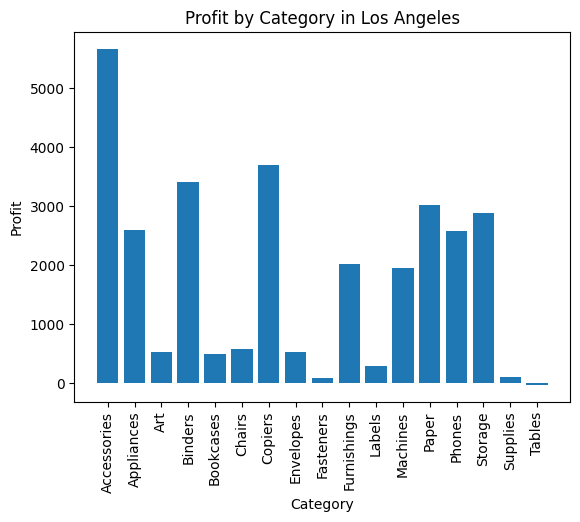

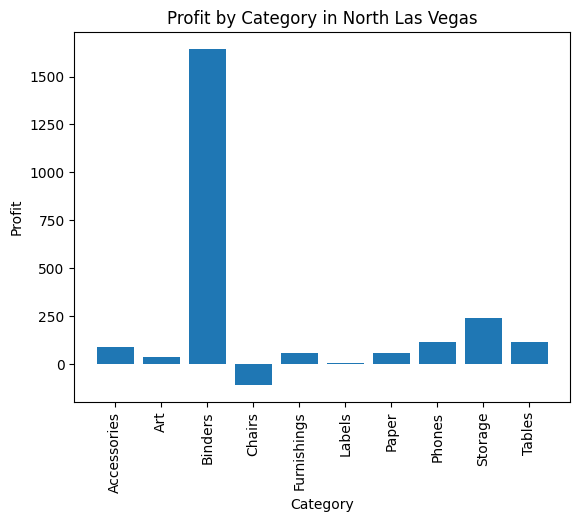

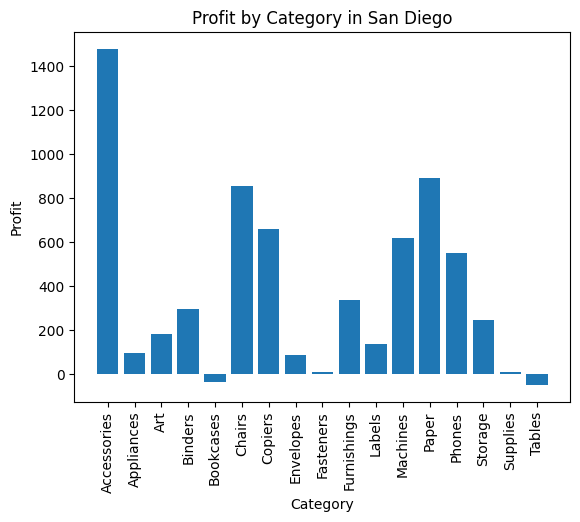

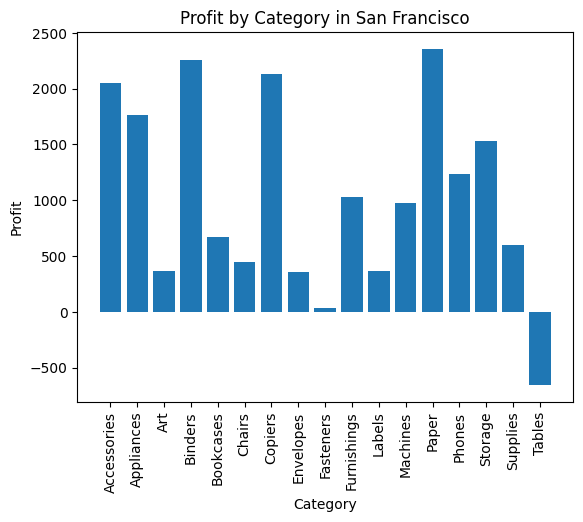

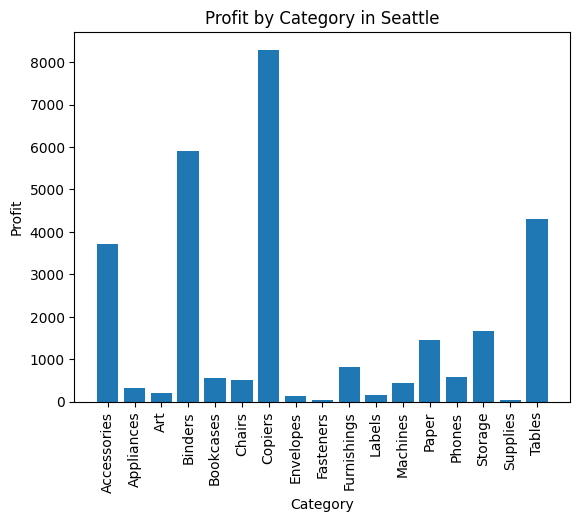

In [ ]:
cities = prof_cat_top['City'].unique()

for city in cities:
    city_data = prof_cat_top[prof_cat_top['City'] == city]
    plt.figure()
    plt.bar(city_data['Category'], city_data['Profit'])
    plt.title(f'Profit by Category in {city}')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#lets trim profit to make it easier to visualize
prof_cat_top_trim = prof_cat_top[prof_cat_top['Profit'] > 1000]
prof_cat_top_trim

City     Category     Profit
0       Los Angeles  Accessories  5667.2927
1       Los Angeles   Appliances  2593.1313
3       Los Angeles      Binders  3411.7499
6       Los Angeles      Copiers  3704.9333
9       Los Angeles  Furnishings  2027.1744
11      Los Angeles     Machines  1954.1657
12      Los Angeles        Paper  3022.0118
13      Los Angeles       Phones  2582.1462
14      Los Angeles      Storage  2892.6561
19  North Las Vegas      Binders  1644.2913
27        San Diego  Accessories  1477.2476
44    San Francisco  Accessories  2046.6957
45    San Francisco   Appliances  1765.7936
47    San Francisco      Binders  2258.5381
50    San Francisco      Copiers  2132.9649
53    San Francisco  Furnishings  1031.0404
56    San Francisco        Paper  2355.7534
57    San Francisco       Phones  1237.8229
58    San Francisco      Storage  1526.2752
61          Seattle  Accessories  3715.1850
64          Seattle      Binders  5904.3276
67          Seattle      Copiers  8290.4449
73          Seattle        Paper  1445.4253
75          Seattle      Storage  1659.3006
77          Seattle       Tables  4303.8480

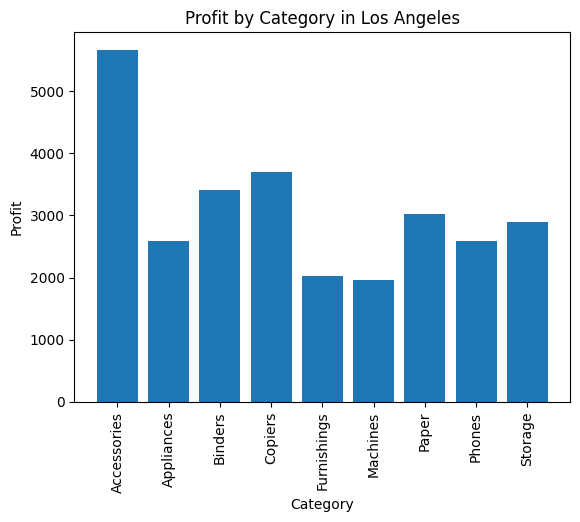

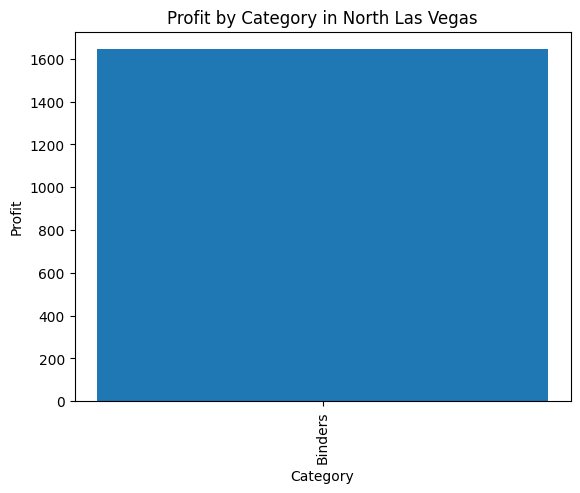

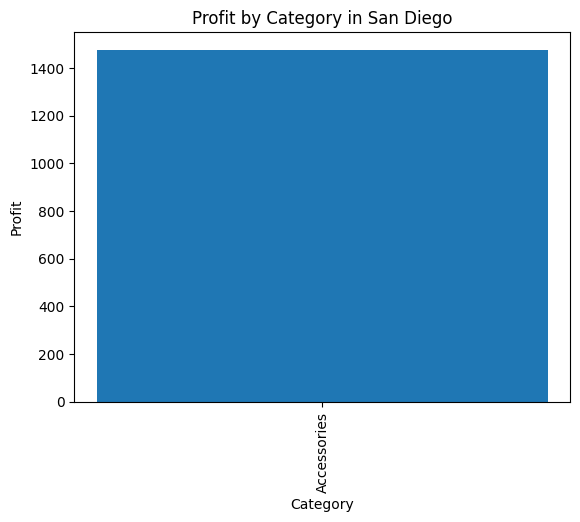

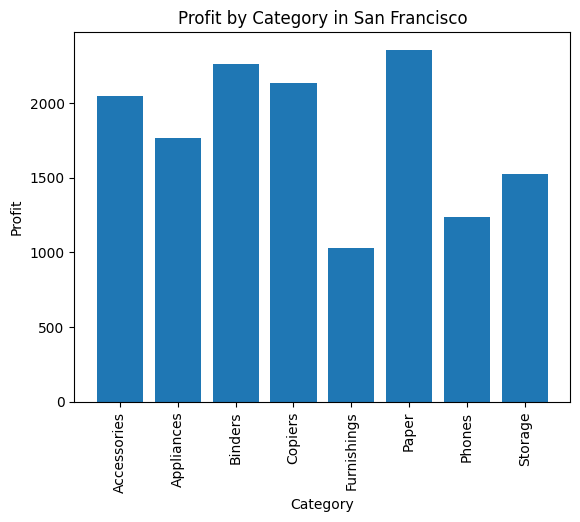

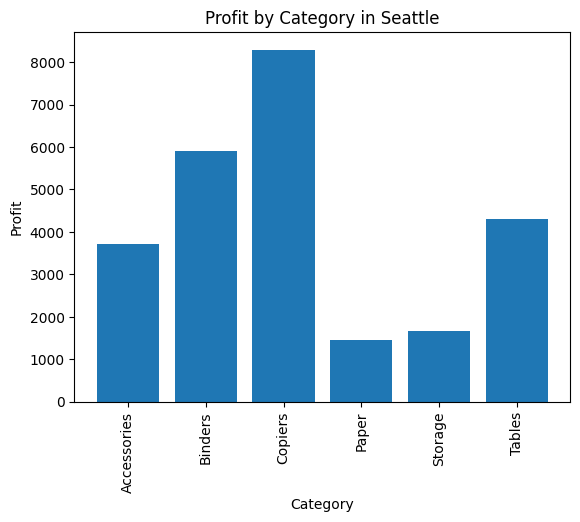

In [ ]:
#Lets run the same bar graph loop to zoom in on the cities
for city in cities:
    city_data = prof_cat_top_trim[prof_cat_top_trim['City'] == city]
    plt.figure()
    plt.bar(city_data['Category'], city_data['Profit'])
    plt.title(f'Profit by Category in {city}')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.show()

We can see from the graph our highest earning categories in our highest earning cities. We can use this information to compare to our top performers.

In [ ]:
#Now lets check out the bottom cities
bottom_cities_df = data[data['Geography'].isin(bottom5_list)]
bottom_cities_df = bottom_cities_df[['Geography', 'Category', 'Profit']]
bottom_cities_df

prof_cat_bottom = bottom_cities_df.groupby(['Geography','Category'])['Profit'].sum().reset_index()
prof_cat_bottom.columns = ['City', 'Category', 'Profit']
prof_cat_bottom

City     Category     Profit
0   Colorado Springs  Accessories    -6.5340
1   Colorado Springs   Appliances     4.5738
2   Colorado Springs          Art     5.7515
3   Colorado Springs      Binders   -98.9202
4   Colorado Springs    Bookcases  -930.5344
5   Colorado Springs       Chairs   169.3038
6   Colorado Springs    Fasteners     9.2988
7   Colorado Springs  Furnishings    80.3482
8   Colorado Springs        Paper    58.1944
9   Colorado Springs       Tables  -248.1660
10        Louisville  Accessories    53.6482
11        Louisville          Art     1.4048
12        Louisville      Binders   -38.9554
13        Louisville    Bookcases  -152.9847
14        Louisville       Chairs    80.6860
15        Louisville    Envelopes     7.4340
16        Louisville    Fasteners     3.0654
17        Louisville  Furnishings    10.7760
18        Louisville     Machines -3399.9800
19        Louisville        Paper    21.8754
20        Louisville       Phones    85.3413
21        Louisville      Storage    20.7459
22        Louisville       Tables   -99.2664
23           Phoenix  Accessories    70.9378
24           Phoenix   Appliances    48.0648
25           Phoenix          Art     1.3276
26           Phoenix      Binders -1287.2978
27           Phoenix    Bookcases  -356.9643
28           Phoenix       Chairs   -11.8043
29           Phoenix    Fasteners    -0.9486
30           Phoenix  Furnishings    20.0151
31           Phoenix       Labels     7.1330
32           Phoenix     Machines  -386.9570
33           Phoenix        Paper   316.1764
34           Phoenix       Phones   277.8737
35           Phoenix      Storage    38.2460
36           Phoenix     Supplies   -34.7580
37           Phoenix       Tables -1491.9276
38            Pueblo  Accessories     0.8495
39            Pueblo   Appliances    84.5728
40            Pueblo          Art     0.8946
41            Pueblo      Binders   -49.0088
42            Pueblo     Machines  -938.2800
43       Springfield  Accessories    58.0738
44       Springfield   Appliances    38.2318
45       Springfield          Art    31.5236
46       Springfield      Binders   -27.0886
47       Springfield    Bookcases  -512.9552
48       Springfield       Chairs    47.8480
49       Springfield    Envelopes    10.4220
50       Springfield    Fasteners     0.1695
51       Springfield  Furnishings    61.3824
52       Springfield       Labels    74.2668
53       Springfield     Machines   -21.9450
54       Springfield        Paper   109.1776
55       Springfield       Phones    94.3776
56       Springfield      Storage  -157.0194
57       Springfield     Supplies     4.3956
58       Springfield       Tables  -664.1691

In [ ]:
#lets trim profit to make it easier to visualize
prof_cat_bottom_trim = prof_cat_bottom[prof_cat_bottom['Profit'] < -250]
prof_cat_bottom_trim

City   Category     Profit
4   Colorado Springs  Bookcases  -930.5344
18        Louisville   Machines -3399.9800
26           Phoenix    Binders -1287.2978
27           Phoenix  Bookcases  -356.9643
32           Phoenix   Machines  -386.9570
37           Phoenix     Tables -1491.9276
42            Pueblo   Machines  -938.2800
47       Springfield  Bookcases  -512.9552
58       Springfield     Tables  -664.1691

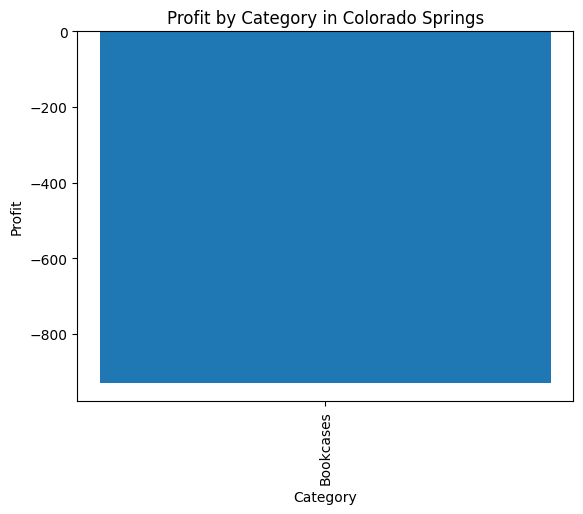

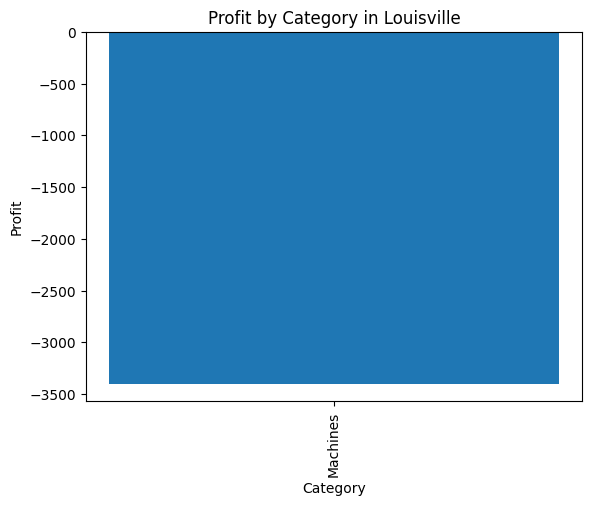

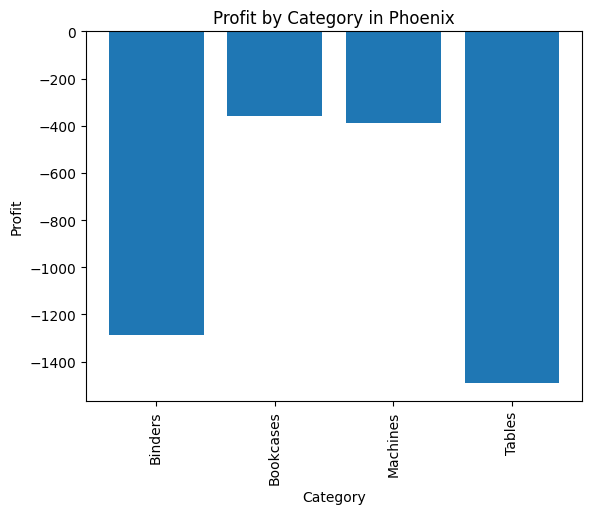

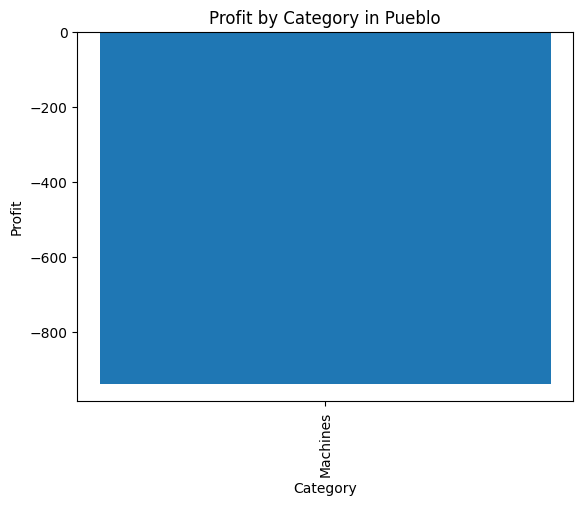

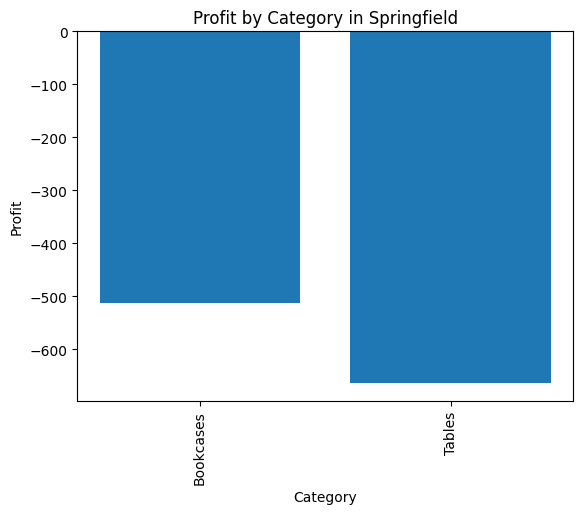

In [ ]:
cities = prof_cat_bottom_trim['City'].unique()

for city in cities:
    city_data = prof_cat_bottom_trim[prof_cat_bottom_trim['City'] == city]
    plt.figure()
    plt.bar(city_data['Category'], city_data['Profit'])
    plt.title(f'Profit by Category in {city}')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.show()

Now we can clearly see what our worst performing categories are in our worse performing cities.

# Question 4
- How long is it taking from Order Date to Ship Date on average? Are there any anomalies in this service?

In [ ]:
data.head()

Order ID Order Date  Ship Date         Customer    Geography  \
0  CA-2013-138688 2013-06-13 2013-06-17   Darrin VanHuff  Los Angeles   
1  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
2  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
3  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
4  CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   

      Category                                       Product Name    Sales  \
0       Labels  Self-Adhesive Address Labels for Typewriters b...   14.620   
1  Furnishings  Eldon Expressions Wood and Plastic Desk Access...   48.860   
2          Art                                         Newell 322    7.280   
3       Phones                     Mitel 5320 IP Phone VoIP phone  907.152   
4      Binders  DXL Angle-View Binders with Locking Rings by S...   18.504   

   Quantity   Profit  
0         2   6.8714  
1         7  14.1694  
2         4   1.9656  
3         4  90.7152  
4         3   5.7825

Now lets pull out the columns that we will need to take a closer look at:

In [ ]:
order_data = data.copy()
order_data = order_data[['Order Date', 'Ship Date', 'Geography', 'Category']]
order_data.head()

Order Date  Ship Date    Geography     Category
0 2013-06-13 2013-06-17  Los Angeles       Labels
1 2011-06-09 2011-06-14  Los Angeles  Furnishings
2 2011-06-09 2011-06-14  Los Angeles          Art
3 2011-06-09 2011-06-14  Los Angeles       Phones
4 2011-06-09 2011-06-14  Los Angeles      Binders

Lets now create a column that has the difference from order date to ship date:

In [ ]:
order_data['Time_to_ship'] = order_data['Ship Date'] - order_data['Order Date']
order_data.head()

Order Date  Ship Date    Geography     Category Time_to_ship
0 2013-06-13 2013-06-17  Los Angeles       Labels       4 days
1 2011-06-09 2011-06-14  Los Angeles  Furnishings       5 days
2 2011-06-09 2011-06-14  Los Angeles          Art       5 days
3 2011-06-09 2011-06-14  Los Angeles       Phones       5 days
4 2011-06-09 2011-06-14  Los Angeles      Binders       5 days

Now we will check the average per Category to see if anything is taking too long

In [ ]:
order_data = order_data.groupby('Category')['Time_to_ship'].mean().reset_index()
order_data

Category              Time_to_ship
0   Accessories 3 days 23:32:05.581395348
1    Appliances 4 days 02:07:03.529411764
2           Art    4 days 00:34:33.600000
3       Binders 3 days 21:24:04.585987261
4     Bookcases           3 days 12:36:00
5        Chairs 3 days 19:42:36.521739130
6       Copiers           3 days 05:45:36
7     Envelopes 3 days 22:12:32.238805970
8     Fasteners           3 days 19:40:00
9   Furnishings 4 days 00:09:28.421052631
10       Labels 4 days 00:49:39.310344827
11     Machines 3 days 23:23:04.615384615
12        Paper           3 days 19:44:00
13       Phones 4 days 00:31:11.480144404
14      Storage 4 days 00:27:04.060150375
15     Supplies           4 days 00:00:00
16       Tables 3 days 21:55:51.724137931

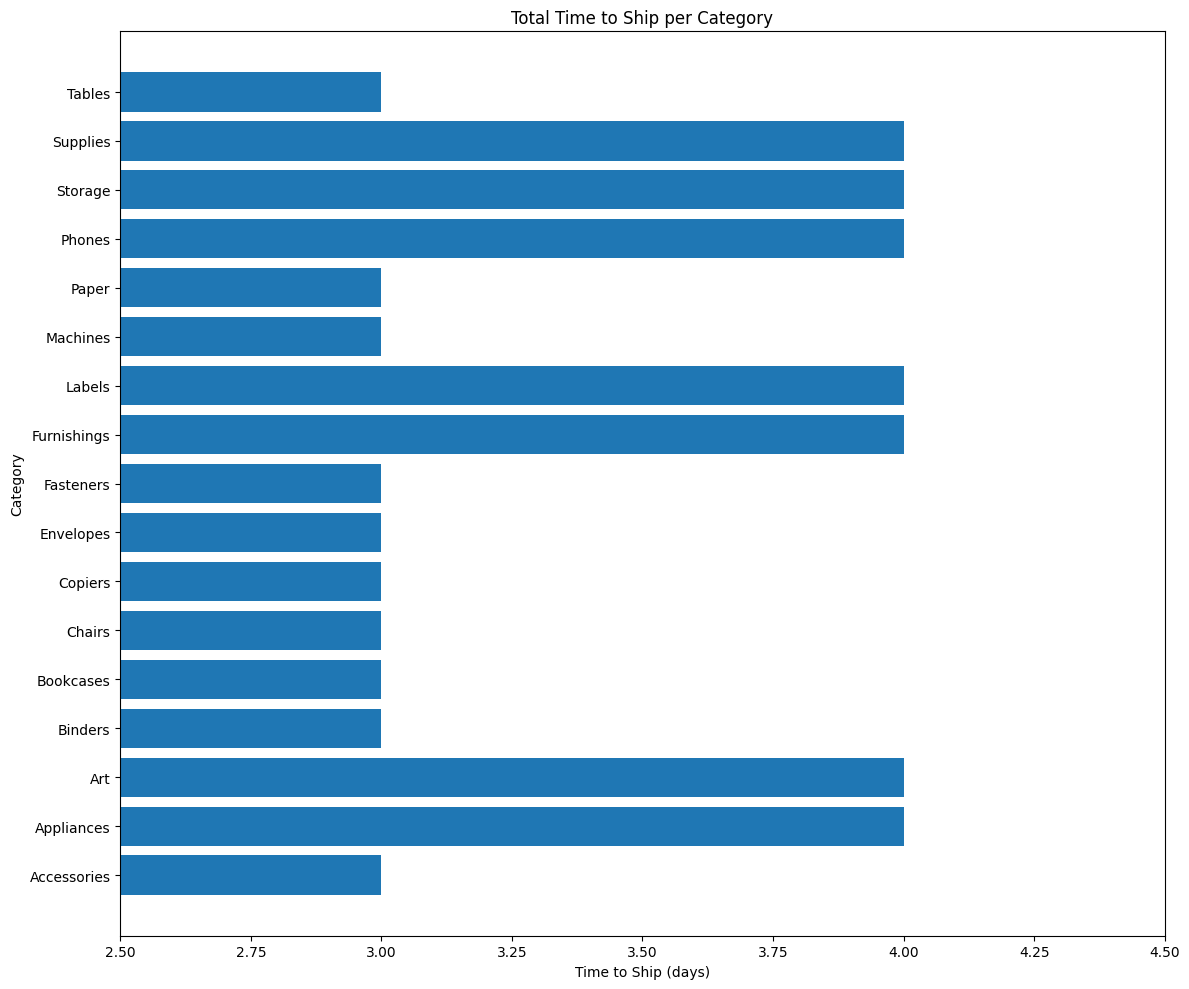

In [ ]:
import matplotlib.ticker as ticker
import datetime as dt

fig, ax = plt.subplots(figsize=(12, 10))
plt.barh(order_data['Category'], order_data['Time_to_ship'].dt.days)

ax.set_xlabel('Time to Ship (days)')
ax.set_ylabel('Category')
ax.set_title('Total Time to Ship per Category')
ax.set_xlim(2.5, 4.5)

plt.tight_layout()
plt.show()

As we can visualize, we found that all of our products are in a 3 or 4 day time frame from the time the customer ordered the product to the time we shipped it off. As an analyst, I see no outliers that stick out in terms of this service. However, we can always check with management and/or other departments on their metrics for each individual category as it arises.

#Business Intelligence Information

##Customer Segmentation

In the first 3 questions we segmented our customers in regards to frequency of order and amount of profit brought in.

We can now use Product Recommendations, Efficient Resource Allocation, Targeted Marketing, and other BI initiatives to improve customer retention and increase profits for the business.

##Cohort Analysis

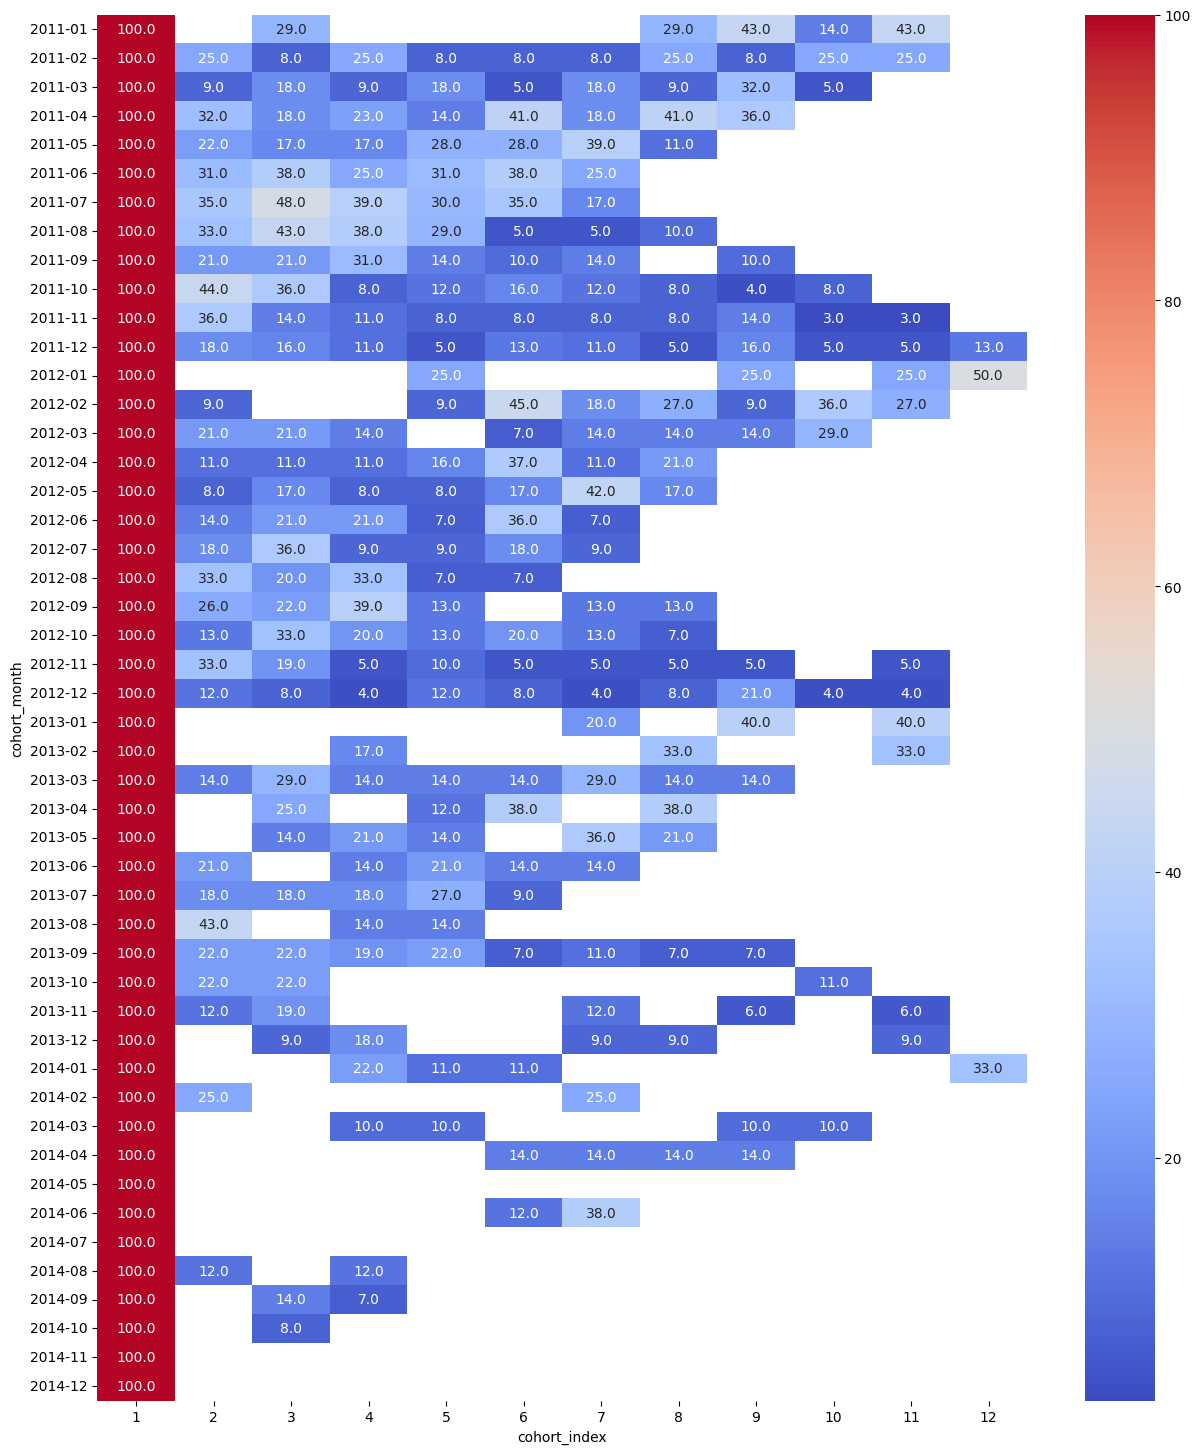

In [ ]:
#Lets create a Cohort Index to show the retention rates of our customers over time
cohort_df = data.copy()

cohort_df['order_month'] = cohort_df['Order Date'].dt.to_period('M')
cohort_df['cohort_month'] = cohort_df.groupby('Customer')['order_month'].transform('min')
cohort_df['cohort_index'] = abs(cohort_df['order_month'].dt.month - cohort_df['cohort_month'].dt.month) + 1

cohort_data = cohort_df.groupby(['cohort_month', 'cohort_index'])['Customer'].nunique().reset_index()
cohort_df = cohort_data.pivot(index = 'cohort_month',
                              columns = 'cohort_index',
                              values = 'Customer')
cohort_final = cohort_df.divide(cohort_df.iloc[:,0], axis = 0).round(2) * 100

plt.figure(figsize = (15, 18))
sns.heatmap(cohort_final, annot = True, fmt = '.1f', cmap = 'coolwarm')
plt.show()

This heatmap shows us an overall decline in retention rates over time. We can see this from the general trend of decreasing percentages in the cohort indexes over months.

It will be a focus of this business to target customers early and often to maintain long-term retention and interest from the customers.

We can go deeper with our analysis to do cohort segmentation, cohort size normalization, and correlation as it relates to marketing the products to give more actionable insights into the next step for the business.

##RFM - Segmentation

In [ ]:
rfm_df = data.copy()
rfm_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [ ]:
#Lets calculate some RFM (Recency, Frequency, Monetary Value) values to further segment our customers for analysis

import datetime as dt

rfm_df = data.copy()

#reference date
ref_date = rfm_df['Order Date'].max() + dt.timedelta(days = 1)

#Calculating our RFM metrics
rfm = rfm_df.groupby(['Customer']).agg({'Order Date': lambda x: (ref_date - x.max()).days,
                                          'Order ID': 'count',
                                          'Sales': 'sum' })
rfm = rfm.rename(columns = {'Order Date': 'Recency',
                            'Order ID': 'Frequency',
                            'Sales': 'Monetary Value'})
rfm.head()

Recency  Frequency  Monetary Value
Customer                                           
Aaron Bergman       1396          3         309.592
Aaron Hawkins        735          5        1328.124
Aaron Smayling        89          3         737.028
Adam Bellavance       55          5        2693.918
Adam Hart            260          5         463.770

In [ ]:
#Lets now set the boundaries of our RFM metrics
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary Value'], q = 4, labels = m_labels)

rfm = rfm.assign(R = r_quartiles,
                 F = f_quartiles,
                 M = m_quartiles)

rfm['RFM_Total'] = rfm.apply(lambda x: str(int(x['R'])) +
                            str(int(x['F'])) + str(int(x['M'])), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

Recency  Frequency  Monetary Value  R  F  M RFM_Total  \
Customer                                                                 
Aaron Bergman       1396          3         309.592  1  2  2       122   
Aaron Hawkins        735          5        1328.124  1  3  3       133   
Aaron Smayling        89          3         737.028  4  2  3       423   
Adam Bellavance       55          5        2693.918  4  3  4       434   
Adam Hart            260          5         463.770  2  3  2       232   

                 RFM_Score  
Customer                    
Aaron Bergman            5  
Aaron Hawkins            7  
Aaron Smayling           9  
Adam Bellavance         11  
Adam Hart                7

In [ ]:
rfm.groupby(['RFM_Total']).size().sort_values(ascending = False)[:5]

RFM_Total
111    64
112    32
444    31
344    29
244    28
dtype: int64

In [ ]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean',
                              'Frequency': 'mean',
                              'Monetary Value': ['mean', 'count']}).round(1)

Recency Frequency Monetary Value      
             mean      mean           mean count
RFM_Score                                       
3           957.1       1.3           69.0    64
4           712.5       1.7          217.8    63
5           542.5       2.2          362.8    71
6           371.0       2.7          473.5    69
7           278.5       3.5          642.7    79
8           271.6       4.6          942.1    73
9           265.2       6.1         1408.3    96
10          212.5       7.8         2106.2    77
11           85.8       9.1         2158.9    63
12           39.3       9.7         3095.6    31

In [ ]:
#Now that we have what we need from RFM, lets divide our entire customer base into Gold, Silver, and Bronze bins

def segments(df):
  if df['RFM_Score'] > 9:
    return 'Gold'
  elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9):
    return 'Silver'
  else:
    return 'Bronze'

rfm['Customer Medals'] = rfm.apply(segments, axis = 1)
rfm.groupby('Customer Medals').agg({'Recency': 'mean',
                                    'Frequency': 'mean',
                                    'Monetary Value': ['mean', 'count']}).round(1)

Recency Frequency Monetary Value      
                   mean      mean           mean count
Customer Medals                                       
Bronze            730.6       1.8          221.7   198
Gold              134.4       8.6         2305.0   171
Silver            293.0       4.4          906.7   317

<Axes: xlabel='Customer Medals'>

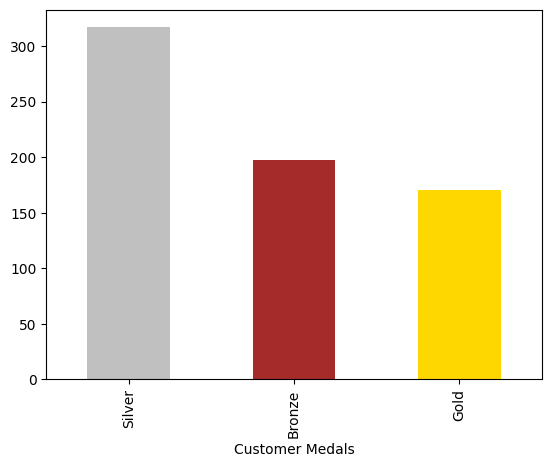

In [ ]:
#Lets create a well-visualized bar graph of the different groups of medals our customers fit in

mapped_colors = ['silver', 'brown', 'gold']

rfm['Customer Medals'].value_counts().plot(kind = 'bar', color = mapped_colors)

In [ ]:
rfm = rfm[['RFM_Score', 'Customer Medals', 'Recency', 'Frequency', 'Monetary Value']].sort_values(by = 'RFM_Score', ascending = False)
rfm

RFM_Score Customer Medals  Recency  Frequency  \
Customer                                                           
Eugene Moren              12            Gold       49          9   
James Galang              12            Gold        2          7   
Patrick Ryan              12            Gold       37          8   
Ken Lonsdale              12            Gold       48          7   
Lindsay Williams          12            Gold       34          9   
...                      ...             ...      ...        ...   
Jack Lebron                3          Bronze      616          1   
Ross DeVincentis           3          Bronze      687          1   
Neil FranzÃ¶sisch          3          Bronze     1188          1   
Neil Ducich                3          Bronze     1200          1   
Georgia Rosenberg          3          Bronze     1137          1   

                   Monetary Value  
Customer                           
Eugene Moren             2498.286  
James Galang             3452.280  
Patrick Ryan             1527.930  
Ken Lonsdale             8472.394  
Lindsay Williams         3126.340  
...                           ...  
Jack Lebron                 3.984  
Ross DeVincentis          146.820  
Neil FranzÃ¶sisch           4.710  
Neil Ducich                73.915  
Georgia Rosenberg          12.960  

[686 rows x 5 columns]

In [ ]:
rfm_data = pd.merge(data, rfm, on='Customer')
rfm_data

Order ID Order Date  Ship Date         Customer    Geography  \
0     CA-2013-138688 2013-06-13 2013-06-17   Darrin VanHuff  Los Angeles   
1     CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
2     CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
3     CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
4     CA-2011-115812 2011-06-09 2011-06-14  Brosina Hoffman  Los Angeles   
...              ...        ...        ...              ...          ...   
3198  CA-2013-125794 2013-09-30 2013-10-04     Maris LaWare  Los Angeles   
3199  CA-2014-121258 2014-02-27 2014-03-04      Dave Brooks   Costa Mesa   
3200  CA-2014-121258 2014-02-27 2014-03-04      Dave Brooks   Costa Mesa   
3201  CA-2014-121258 2014-02-27 2014-03-04      Dave Brooks   Costa Mesa   
3202  CA-2014-119914 2014-05-05 2014-05-10     Chris Cortes  Westminster   

         Category                                       Product Name    Sales  \
0          Labels  Self-Adhesive Address Labels for Typewriters b...   14.620   
1     Furnishings  Eldon Expressions Wood and Plastic Desk Access...   48.860   
2             Art                                         Newell 322    7.280   
3          Phones                     Mitel 5320 IP Phone VoIP phone  907.152   
4         Binders  DXL Angle-View Binders with Locking Rings by S...   18.504   
...           ...                                                ...      ...   
3198  Accessories  Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...   36.240   
3199  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.960   
3200       Phones                              Aastra 57i VoIP phone  258.576   
3201        Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.600   
3202   Appliances  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.160   

      Quantity   Profit  RFM_Score Customer Medals  Recency  Frequency  \
0            2   6.8714          5          Bronze      464          3   
1            7  14.1694          9          Silver     1302          7   
2            4   1.9656          9          Silver     1302          7   
3            4  90.7152          9          Silver     1302          7   
4            3   5.7825          9          Silver     1302          7   
...        ...      ...        ...             ...      ...        ...   
3198         1  15.2208          9          Silver      166          6   
3199         2  15.6332          7          Silver      308          4   
3200         2  19.3932          7          Silver      308          4   
3201         4  13.3200          7          Silver      308          4   
3202         2  72.9480         11            Gold       45          9   

      Monetary Value  
0             37.600  
1           3714.304  
2           3714.304  
3           3714.304  
4           3714.304  
...              ...  
3198        1335.136  
3199         837.704  
3200         837.704  
3201         837.704  
3202         819.110  

[3203 rows x 15 columns]

**Bronze:**
- These customers had the longest mean recency value of 730 days which means they did not make a purchase the longest out of the 3 groups on average.
- They have the lowest mean frequency of around 1.8 purchases which also is the lowest of the 3.
- As a whole, the Bronze group is our least engaged, least profitable, and least monetary valued customer base.

**Silver:**
- These customers represent a middle of the pack approach in regards to the RFM metrics.
- They learn closer to Gold in terms of recency of purchase but lean closer to Bronze in regards to monetary value.

**Gold:**
- Our most highly valued customer base has the best RFM metrics across the board.
- They frequently buy, are the most engaged, and present the best monetary value to the business.

#Summary

- For Question 1, we analyzed that there is no correlation between our top-ordered customers and our most profitable customers.
- For Question 2, we can see that Binders and Copiers are a part of our top profit makers and holds true for the items our top earners are purchasing from.
- For Question 3, geographically, Binders, Copiers, and Accessories are among the top products in our most profitable markets. Apart from Phoenis, Machines, Bookcases, and Tablets are driving the loss in profits in our worst performing areas.
- From Question 4, we used basic time-series analysis to find no immediate outliers in the speed of which the customer orders the product and the time it takes to ship it off.
- When looking at the Business Intelligence metrics we can dive deeper into the analysis and find key metrics to further future business decisions.
- We used Cohort Indexes and RFM metrics to segment our customers so the business can use this more targeted info to make targeted moves to improve on them.

BONUS:  Writing the Pandas Dataframes to Excel for use in our Streamlit app

In [ ]:
with pd.ExcelWriter('RFM.xlsx') as writer:
    rfm.to_excel(writer, sheet_name = 'RFM')

with pd.ExcelWriter('Total Profit Categories.xlsx') as writer:
    df_small.to_excel(writer, sheet_name = 'Total Profit of Each Category')

with pd.ExcelWriter('Top 5 Cities.xlsx') as writer:
    top5_cities.to_excel(writer, sheet_name = 'Top 5 Most Profitable Cities')

with pd.ExcelWriter('Bottom 5 Cities.xlsx') as writer:
    bottom5_cities.to_excel(writer, sheet_name = 'Bottom 5 Least Profitable Cities')

with pd.ExcelWriter('Top 10 Customers.xlsx') as writer:
    top10_earners.to_excel(writer, sheet_name='Top 10 Most profitable Customers')

with pd.ExcelWriter('Prof Cat Top.xlsx') as writer:
    prof_cat_top.to_excel(writer, sheet_name = 'Top 5 Cities_Category Profit')

with pd.ExcelWriter('Prof Cat Bottom.xlsx') as writer:
    prof_cat_bottom.to_excel(writer, sheet_name = 'Bottom 5 Cities_Category Profit')

/usr/local/lib/python3.11/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
with pd.ExcelWriter('Amazon Sales Code Project (RFM Included).xlsx') as writer:
  rfm_data.to_excel(writer, sheet_name='RFM included')

# Sources Used

- https://www.kaggle.com/code/shahriarkabir/customer-segmentation-eda
